In [1]:
from experiments.plt_pab_fae import plt_fab_fae
from protocol.BB84EveTrainableProtocol import BB84EveTrainableProtocol
from protocol.BB84TrainableProtocol import BB84TrainableProtocol
from protocol.connection_elements.Layer import SeparableLayer, EntangledLayer
from protocol.BB84Protocol import BB84Protocol
from protocol.connection_elements.MultiQubitQCLEve import MultiQubitQCLEve


No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit/circuit/quantumcircuit.py:3428: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  return circuit_drawer(


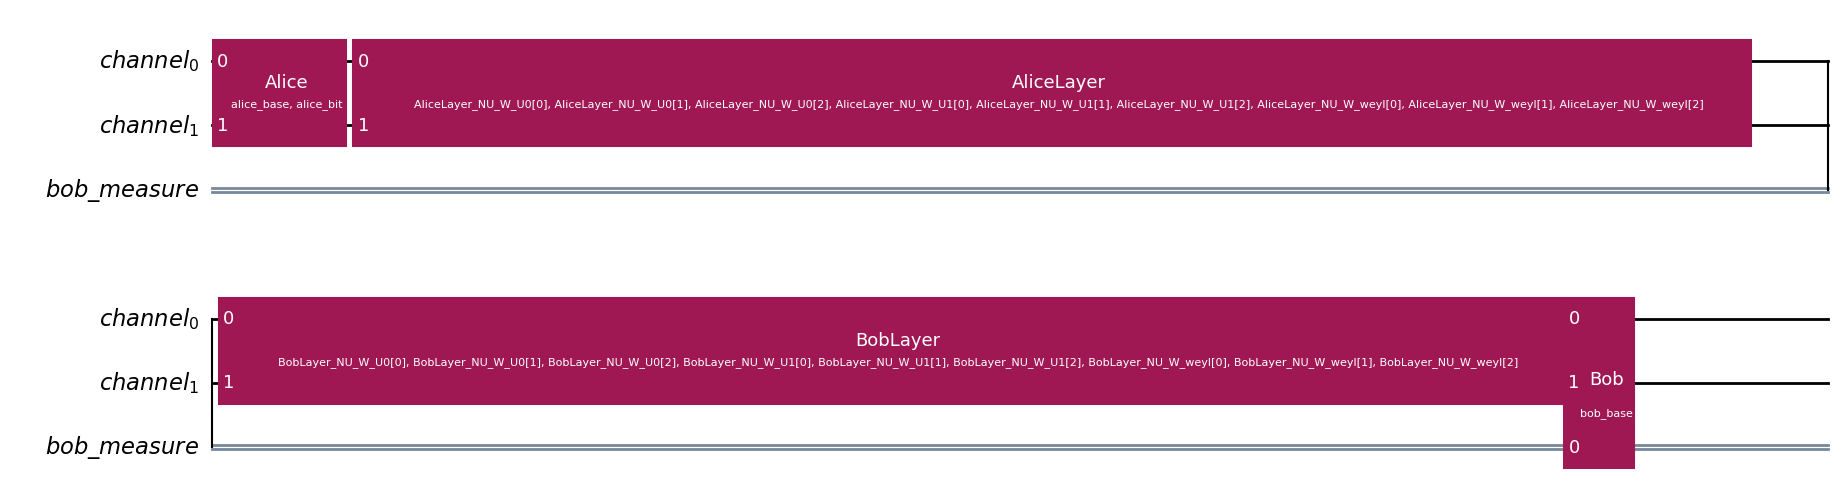

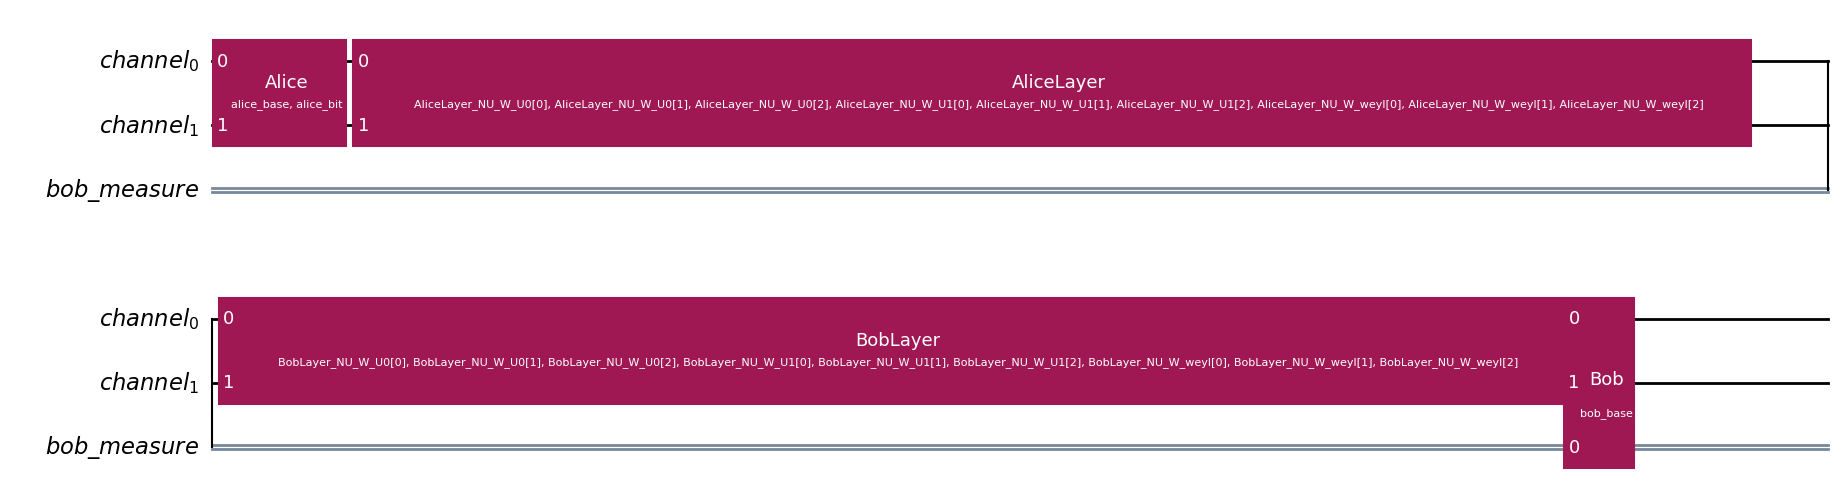

In [2]:
layers = [EntangledLayer("AliceLayer"), EntangledLayer("BobLayer")]
eve = MultiQubitQCLEve()

ab_protocol = BB84TrainableProtocol(n_bits=512, elements=layers, channel_size=2, seed=0, learning_rate=0.1)
eve_protocol = BB84EveTrainableProtocol(n_bits=512, elements=[layers[0], eve, layers[1]], channel_size=2,
                                        seed=0)

qc, _ = ab_protocol.qc_with_ctx()
qc.draw("mpl", expr_len=3)

In [3]:
def train_eve():
    bob_qber, eve_qber = [], []
    qber = eve_protocol.run()
    bob_qber.append(qber['bob_qber'])
    eve_qber.append(qber['eve_qber'])
    print(f'start QBER: {qber}')
    for epoch in range(50):
        loss = eve_protocol.train()
        qber = eve_protocol.run()
        bob_qber.append(qber['bob_qber'])
        eve_qber.append(qber['eve_qber'])
        if epoch % 5 == 0 or epoch == 49:
            print(f'epoch: {epoch}, loss: {loss}, QBER: {qber}')
    return bob_qber, eve_qber

def train_ab():
    bob_qber, eve_qber = [], []
    qber = ab_protocol.run()
    bob_qber.append(qber['bob_qber'])
    eve_qber.append(0.5)
    print(f'start QBER: {qber}')
    for epoch in range(20):
        loss = ab_protocol.train()
        qber = ab_protocol.run()
        bob_qber.append(qber['bob_qber'])
        eve_qber.append(0.5)
        if epoch % 5 == 0 or epoch == 19:
            print(f'epoch: {epoch}, loss: {loss}, QBER: {qber}')
    return bob_qber, eve_qber

# Krok 1 - trenowanie Alice i Boba do początkowego stanu
Uczymy Alice i Boba bez Eve, aby miały sensowne parametry początkowe i potrafiły przekazywać sobie dane.

In [4]:
b_q, e_q = train_ab()

start QBER: {'bob_qber': np.float64(0.25)}
epoch: 0, loss: -0.772595226764679, QBER: {'bob_qber': np.float64(0.13095238095238093)}
epoch: 5, loss: -0.965904951095581, QBER: {'bob_qber': np.float64(0.031746031746031744)}
epoch: 10, loss: -0.9857445359230042, QBER: {'bob_qber': np.float64(0.011904761904761862)}
epoch: 15, loss: -0.987575113773346, QBER: {'bob_qber': np.float64(0.007936507936507908)}
epoch: 19, loss: -0.9964832663536072, QBER: {'bob_qber': np.float64(0.007936507936507908)}


<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

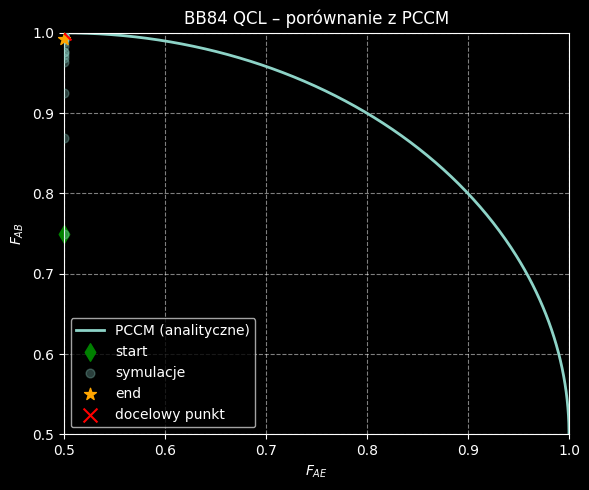

In [5]:
plt_fab_fae(b_q, e_q, 1)

# Krok 2 - trenowanie tylko Eve, warstwy Alice i Boba zamrożone
Uczymy samą Eve, docelowa dokładność Boba to 0.8. Startujemy od parametrów Alice i Boba wytrenowanych w poprzednim kroku i Eve jako identyczność.

In [6]:
eve_protocol.set_parameters(ab_protocol.get_all_parameters())

params = eve_protocol.get_all_parameters()
for p in eve.nu.params():
    k = p.name
    params[k] = 0

eve_protocol.set_parameters(params)
eve_protocol.freeze_elements(layers)
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())


No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'NU_W_0_0_U0[0]': np.float32(0.0), 'NU_W_0_0_U0[1]': np.float32(0.0), 'NU_W_0_0_U0[2]': np.float32(0.0), 'NU_W_0_0_U1[0]': np.float32(0.0), 'NU_W_0_0_U1[1]': np.float32(0.0), 'NU_W_0_0_U1[2]': np.float32(0.0), 'NU_W_0_0_weyl[0]': np.float32(0.0), 'NU_W_0_0_weyl[1]': np.float32(0.0), 'NU_W_0_0_weyl[2]': np.float32(0.0), 'NU_W_0_1_U0[0]': np.float32(0.0), 'NU_W_0_1_U0[1]': np.float32(0.0), 'NU_W_0_1_U0[2]': np.float32(0.0), 'NU_W_0_1_U1[0]': np.float32(0.0), 'NU_W_0_1_U1[1]': np.float32(0.0), 'NU_W_0_1_U1[2]': np.float32(0.0), 'NU_W_0_1_weyl[0]': np.float32(0.0), 'NU_W_0_1_weyl[1]': np.float32(0.0), 'NU_W_0_1_weyl[2]': np.float32(0.0), 'NU_W_1_0_U0[0]': np.float32(0.0), 'NU_W_1_0_U0[1]': np.float32(0.0), 'NU_W_1_0_U0[2]': np.float32(0.0), 'NU_W_1_0_U1[0]': np.float32(0.0), 'NU_W_1_0_U1[1]': np.float32(0.0), 'NU_W_1_0_U1[2]': np.float32(0.0), 'NU_W_1_0_weyl[0]': np.float32(0.0), 'NU_W_1_0_weyl[1]': np.float32(0.0), 'NU_W_1_0_weyl[2]': np.float32(0.0), 'NU_W_2_0_U0[0

In [7]:
eve_protocol.f_value = 0.8
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.003676470588235281), 'eve_qber': np.float64(0.5441176470588236)}
epoch: 0, loss: -0.13924241065979004, QBER: {'bob_qber': np.float64(0.13970588235294112), 'eve_qber': np.float64(0.5514705882352942)}
epoch: 5, loss: -0.5275118947029114, QBER: {'bob_qber': np.float64(0.19485294117647056), 'eve_qber': np.float64(0.44852941176470584)}
epoch: 10, loss: -0.6481519341468811, QBER: {'bob_qber': np.float64(0.23161764705882348), 'eve_qber': np.float64(0.30147058823529416)}
epoch: 15, loss: -0.7786227464675903, QBER: {'bob_qber': np.float64(0.23897058823529416), 'eve_qber': np.float64(0.19485294117647056)}
epoch: 20, loss: -0.8307095170021057, QBER: {'bob_qber': np.float64(0.23161764705882348), 'eve_qber': np.float64(0.14338235294117652)}
epoch: 25, loss: -0.8728890419006348, QBER: {'bob_qber': np.float64(0.24632352941176472), 'eve_qber': np.float64(0.09926470588235292)}
epoch: 30, loss: -0.9057362675666809, QBER: {'bob_qber': np.float64(0.23897058823529416),

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

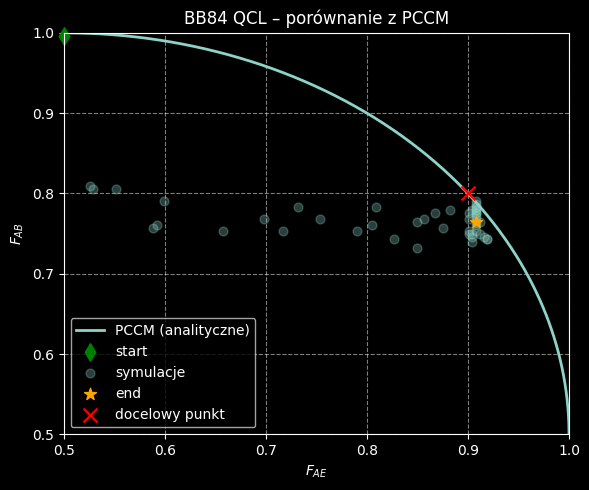

In [8]:
plt_fab_fae(b_q, e_q, 0.8)

# Krok 3 - trenowanie warstw Alice i Boba, Eve zamrożona
Próbujemy uczyć Alice i Boba z użyciem nowej funkcji straty, która maksymalizuje jedynie dokładność Boba.

In [9]:
eve_protocol.freeze_elements([eve])
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'AliceLayer_NU_W_U0[0]': np.float32(-0.6375591), 'AliceLayer_NU_W_U0[1]': np.float32(-0.22003405), 'AliceLayer_NU_W_U0[2]': np.float32(-0.3790048), 'AliceLayer_NU_W_U1[0]': np.float32(0.47046706), 'AliceLayer_NU_W_U1[1]': np.float32(-0.9822486), 'AliceLayer_NU_W_U1[2]': np.float32(-0.4929397), 'AliceLayer_NU_W_weyl[0]': np.float32(0.46623656), 'AliceLayer_NU_W_weyl[1]': np.float32(0.22633427), 'AliceLayer_NU_W_weyl[2]': np.float32(0.9031445), 'BobLayer_NU_W_U0[0]': np.float32(0.5452298), 'BobLayer_NU_W_U0[1]': np.float32(0.5642023), 'BobLayer_NU_W_U0[2]': np.float32(-0.19376984), 'BobLayer_NU_W_U1[0]': np.float32(0.60971105), 'BobLayer_NU_W_U1[1]': np.float32(0.24591269), 'BobLayer_NU_W_U1[2]': np.float32(0.20425232), 'BobLayer_NU_W_weyl[0]': np.float32(-0.45400938), 'BobLayer_NU_W_weyl[1]': np.float32(-0.26593795), 'BobLayer_NU_W_weyl[2]': np.float32(-0.68928874)}
Frozen parameters: {'NU_W_0_0_U0[0]': np.float32(1.1314989), 'NU_W_0_0_U0[1]': np.float32(-0.594347

/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


In [10]:
eve_loss = eve_protocol.loss
eve_protocol.loss = ab_protocol.loss
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.23529411764705888), 'eve_qber': np.float64(0.09191176470588236)}
epoch: 0, loss: -0.7682209014892578, QBER: {'bob_qber': np.float64(0.20588235294117652), 'eve_qber': np.float64(0.11397058823529416)}
epoch: 5, loss: -0.8823766112327576, QBER: {'bob_qber': np.float64(0.1470588235294118), 'eve_qber': np.float64(0.24632352941176472)}
epoch: 10, loss: -0.8923788666725159, QBER: {'bob_qber': np.float64(0.1029411764705882), 'eve_qber': np.float64(0.3382352941176471)}
epoch: 15, loss: -0.9085597991943359, QBER: {'bob_qber': np.float64(0.11397058823529416), 'eve_qber': np.float64(0.3602941176470589)}
epoch: 20, loss: -0.9393950700759888, QBER: {'bob_qber': np.float64(0.07352941176470584), 'eve_qber': np.float64(0.4522058823529411)}
epoch: 25, loss: -0.9750006794929504, QBER: {'bob_qber': np.float64(0.022058823529411797), 'eve_qber': np.float64(0.5220588235294117)}
epoch: 30, loss: -0.9810478687286377, QBER: {'bob_qber': np.float64(0.02941176470588236), 'eve

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

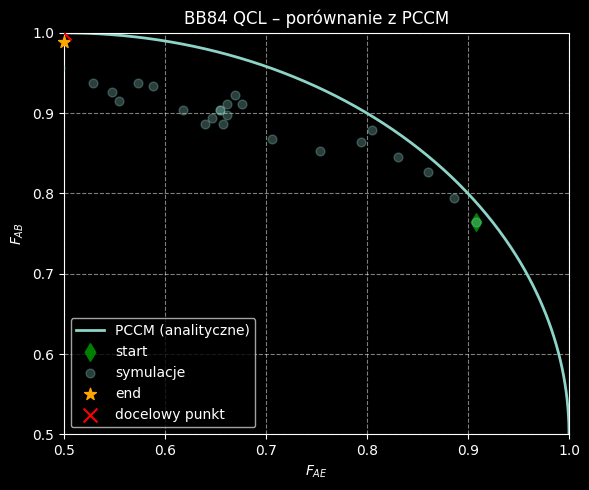

In [11]:
plt_fab_fae(b_q, e_q, 1)

In [12]:
eve_protocol.freeze_elements(layers)
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'NU_W_0_0_U0[0]': np.float32(1.1314989), 'NU_W_0_0_U0[1]': np.float32(-0.59434783), 'NU_W_0_0_U0[2]': np.float32(0.07656502), 'NU_W_0_0_U1[0]': np.float32(0.26833135), 'NU_W_0_0_U1[1]': np.float32(-0.46106076), 'NU_W_0_0_U1[2]': np.float32(-0.120103255), 'NU_W_0_0_weyl[0]': np.float32(-1.2048826), 'NU_W_0_0_weyl[1]': np.float32(-0.8456237), 'NU_W_0_0_weyl[2]': np.float32(0.8304386), 'NU_W_0_1_U0[0]': np.float32(-0.33636597), 'NU_W_0_1_U0[1]': np.float32(0.4594801), 'NU_W_0_1_U0[2]': np.float32(-9.1662296e-09), 'NU_W_0_1_U1[0]': np.float32(0.07206216), 'NU_W_0_1_U1[1]': np.float32(-1.0192358), 'NU_W_0_1_U1[2]': np.float32(-4.39989e-09), 'NU_W_0_1_weyl[0]': np.float32(0.14816222), 'NU_W_0_1_weyl[1]': np.float32(0.14460965), 'NU_W_0_1_weyl[2]': np.float32(0.42788094), 'NU_W_1_0_U0[0]': np.float32(0.01698253), 'NU_W_1_0_U0[1]': np.float32(0.08893536), 'NU_W_1_0_U0[2]': np.float32(0.0040031434), 'NU_W_1_0_U1[0]': np.float32(-0.30765277), 'NU_W_1_0_U1[1]': np.float32(0

/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


In [13]:
eve_protocol.f_value = 0.8
eve_protocol.loss = eve_loss
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.011029411764705843), 'eve_qber': np.float64(0.5367647058823529)}
epoch: 0, loss: -0.11777880787849426, QBER: {'bob_qber': np.float64(0.05147058823529416), 'eve_qber': np.float64(0.4816176470588235)}
epoch: 5, loss: -0.7047652006149292, QBER: {'bob_qber': np.float64(0.1875), 'eve_qber': np.float64(0.2536764705882353)}
epoch: 10, loss: -0.7776651382446289, QBER: {'bob_qber': np.float64(0.20220588235294112), 'eve_qber': np.float64(0.21323529411764708)}
epoch: 15, loss: -0.8300065994262695, QBER: {'bob_qber': np.float64(0.2757352941176471), 'eve_qber': np.float64(0.13602941176470584)}
epoch: 20, loss: -0.864963948726654, QBER: {'bob_qber': np.float64(0.25), 'eve_qber': np.float64(0.11764705882352944)}
epoch: 25, loss: -0.8916118144989014, QBER: {'bob_qber': np.float64(0.26102941176470584), 'eve_qber': np.float64(0.1029411764705882)}
epoch: 30, loss: -0.8989154100418091, QBER: {'bob_qber': np.float64(0.2720588235294118), 'eve_qber': np.float64(0.0882352

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

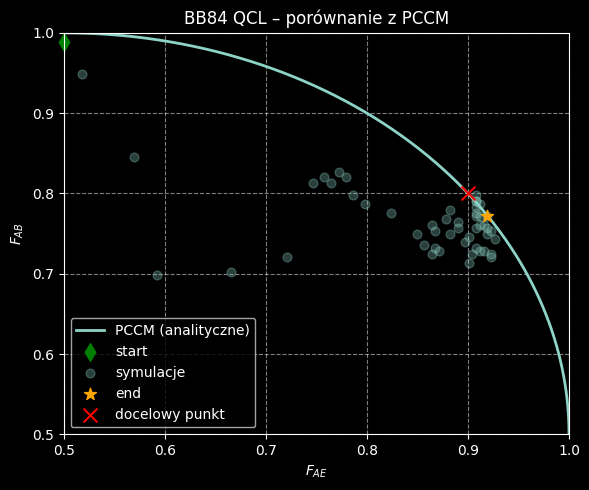

In [14]:
plt_fab_fae(b_q, e_q, 0.8)

In [15]:
eve_protocol.freeze_elements([eve])
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'AliceLayer_NU_W_U0[0]': np.float32(0.7100755), 'AliceLayer_NU_W_U0[1]': np.float32(-0.13770962), 'AliceLayer_NU_W_U0[2]': np.float32(0.3191865), 'AliceLayer_NU_W_U1[0]': np.float32(-1.0639342), 'AliceLayer_NU_W_U1[1]': np.float32(-0.61197644), 'AliceLayer_NU_W_U1[2]': np.float32(-0.4929397), 'AliceLayer_NU_W_weyl[0]': np.float32(1.8736956), 'AliceLayer_NU_W_weyl[1]': np.float32(1.2188697), 'AliceLayer_NU_W_weyl[2]': np.float32(-0.40589076), 'BobLayer_NU_W_U0[0]': np.float32(-0.08031474), 'BobLayer_NU_W_U0[1]': np.float32(-0.1397197), 'BobLayer_NU_W_U0[2]': np.float32(0.45674813), 'BobLayer_NU_W_U1[0]': np.float32(-0.6560019), 'BobLayer_NU_W_U1[1]': np.float32(0.7871385), 'BobLayer_NU_W_U1[2]': np.float32(0.8576264), 'BobLayer_NU_W_weyl[0]': np.float32(-0.6843797), 'BobLayer_NU_W_weyl[1]': np.float32(0.3545092), 'BobLayer_NU_W_weyl[2]': np.float32(-0.040083095)}
Frozen parameters: {'NU_W_0_0_U0[0]': np.float32(0.8007792), 'NU_W_0_0_U0[1]': np.float32(0.081690945)

/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


In [16]:
eve_protocol.loss = ab_protocol.loss
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.2279411764705882), 'eve_qber': np.float64(0.08088235294117652)}
epoch: 0, loss: -0.7589529752731323, QBER: {'bob_qber': np.float64(0.20220588235294112), 'eve_qber': np.float64(0.11397058823529416)}
epoch: 5, loss: -0.907227098941803, QBER: {'bob_qber': np.float64(0.07352941176470584), 'eve_qber': np.float64(0.3382352941176471)}
epoch: 10, loss: -0.9709442257881165, QBER: {'bob_qber': np.float64(0.03308823529411764), 'eve_qber': np.float64(0.48897058823529416)}
epoch: 15, loss: -0.9497284293174744, QBER: {'bob_qber': np.float64(0.044117647058823484), 'eve_qber': np.float64(0.5588235294117647)}
epoch: 20, loss: -0.9568572044372559, QBER: {'bob_qber': np.float64(0.044117647058823484), 'eve_qber': np.float64(0.5477941176470589)}
epoch: 25, loss: -0.9791007041931152, QBER: {'bob_qber': np.float64(0.02941176470588236), 'eve_qber': np.float64(0.48897058823529416)}
epoch: 30, loss: -0.97138512134552, QBER: {'bob_qber': np.float64(0.02941176470588236), 'eve

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

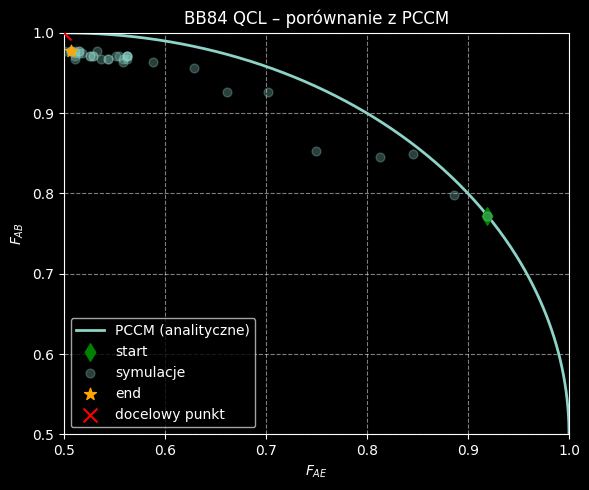

In [17]:
plt_fab_fae(b_q, e_q, 1)

In [18]:
print("All parameters:", eve_protocol.get_all_parameters())

All parameters: {'NU_W_0_0_U0[0]': np.float32(0.8007792), 'NU_W_0_0_U0[1]': np.float32(0.081690945), 'NU_W_0_0_U0[2]': np.float32(-0.9052124), 'NU_W_0_0_U1[0]': np.float32(0.95634955), 'NU_W_0_0_U1[1]': np.float32(0.6847069), 'NU_W_0_0_U1[2]': np.float32(-0.8266483), 'NU_W_0_0_weyl[0]': np.float32(-0.8999139), 'NU_W_0_0_weyl[1]': np.float32(-0.3343696), 'NU_W_0_0_weyl[2]': np.float32(-0.11065829), 'NU_W_0_1_U0[0]': np.float32(-0.22954258), 'NU_W_0_1_U0[1]': np.float32(0.45803508), 'NU_W_0_1_U0[2]': np.float32(-1.2497059e-08), 'NU_W_0_1_U1[0]': np.float32(0.046671674), 'NU_W_0_1_U1[1]': np.float32(-1.798425), 'NU_W_0_1_U1[2]': np.float32(-4.39989e-09), 'NU_W_0_1_weyl[0]': np.float32(-0.23602514), 'NU_W_0_1_weyl[1]': np.float32(-0.23380855), 'NU_W_0_1_weyl[2]': np.float32(0.25383198), 'NU_W_1_0_U0[0]': np.float32(-0.23295996), 'NU_W_1_0_U0[1]': np.float32(0.2347658), 'NU_W_1_0_U0[2]': np.float32(-0.23012029), 'NU_W_1_0_U1[0]': np.float32(-0.21335627), 'NU_W_1_0_U1[1]': np.float32(0.61253

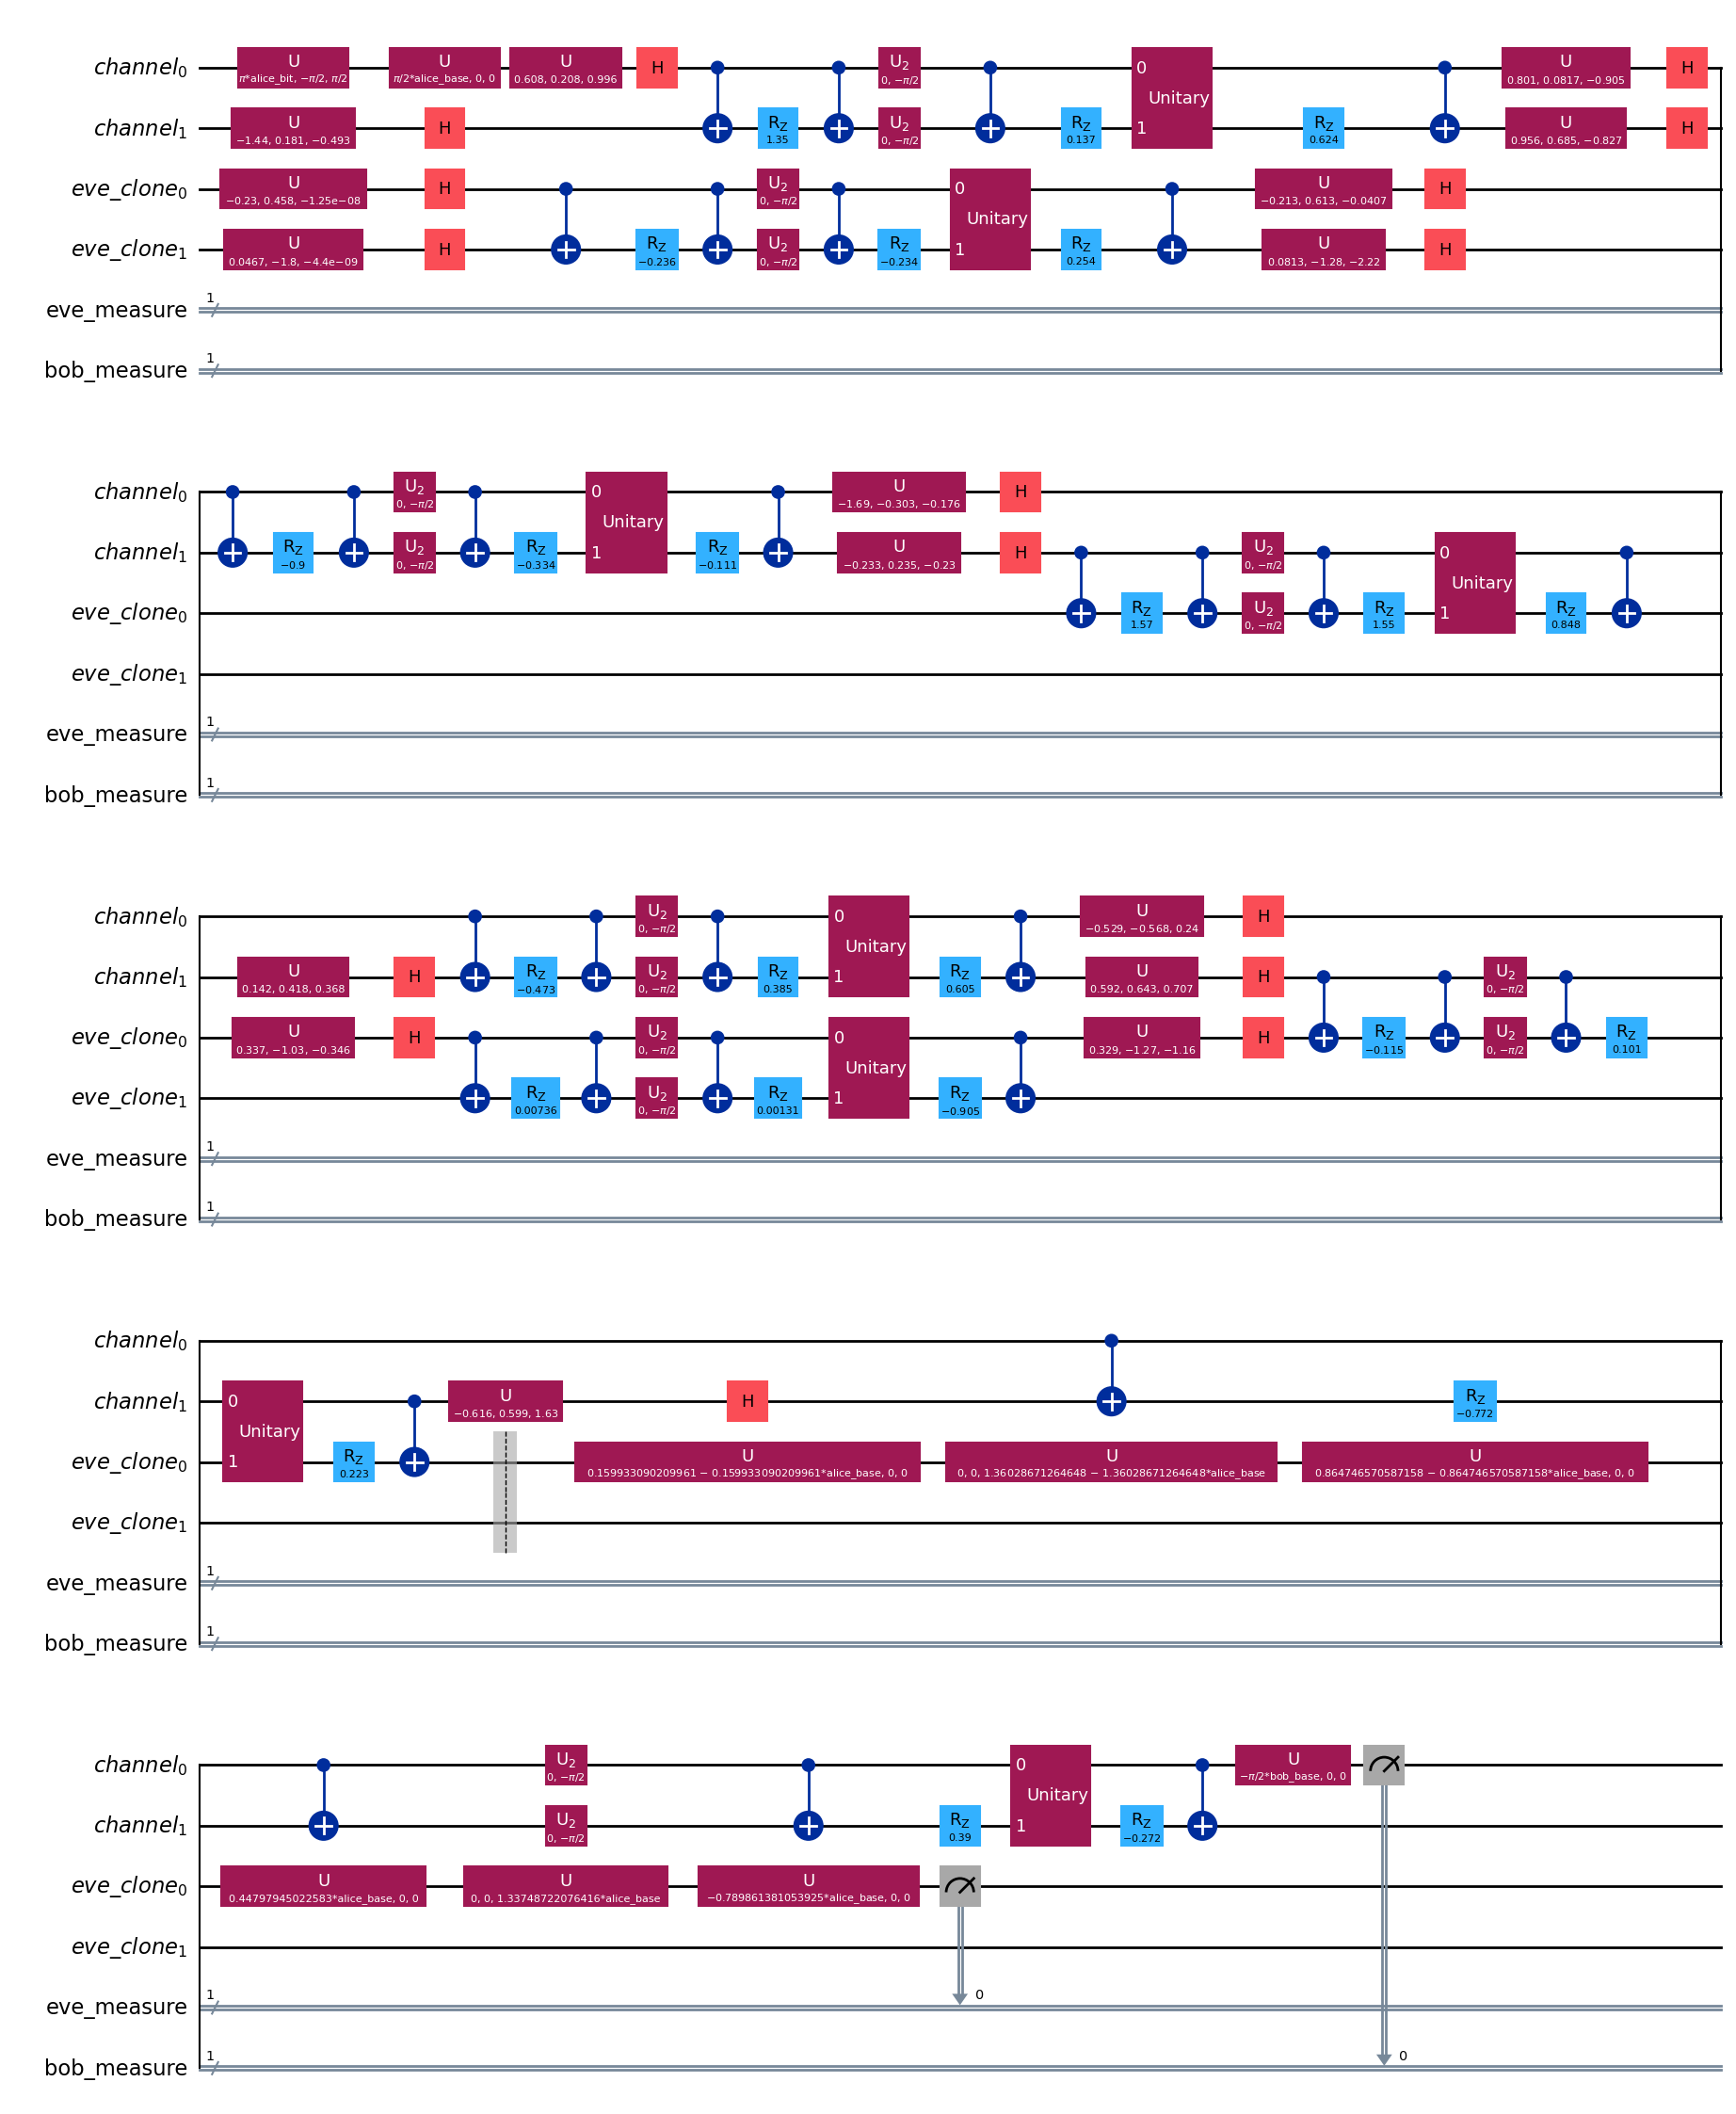

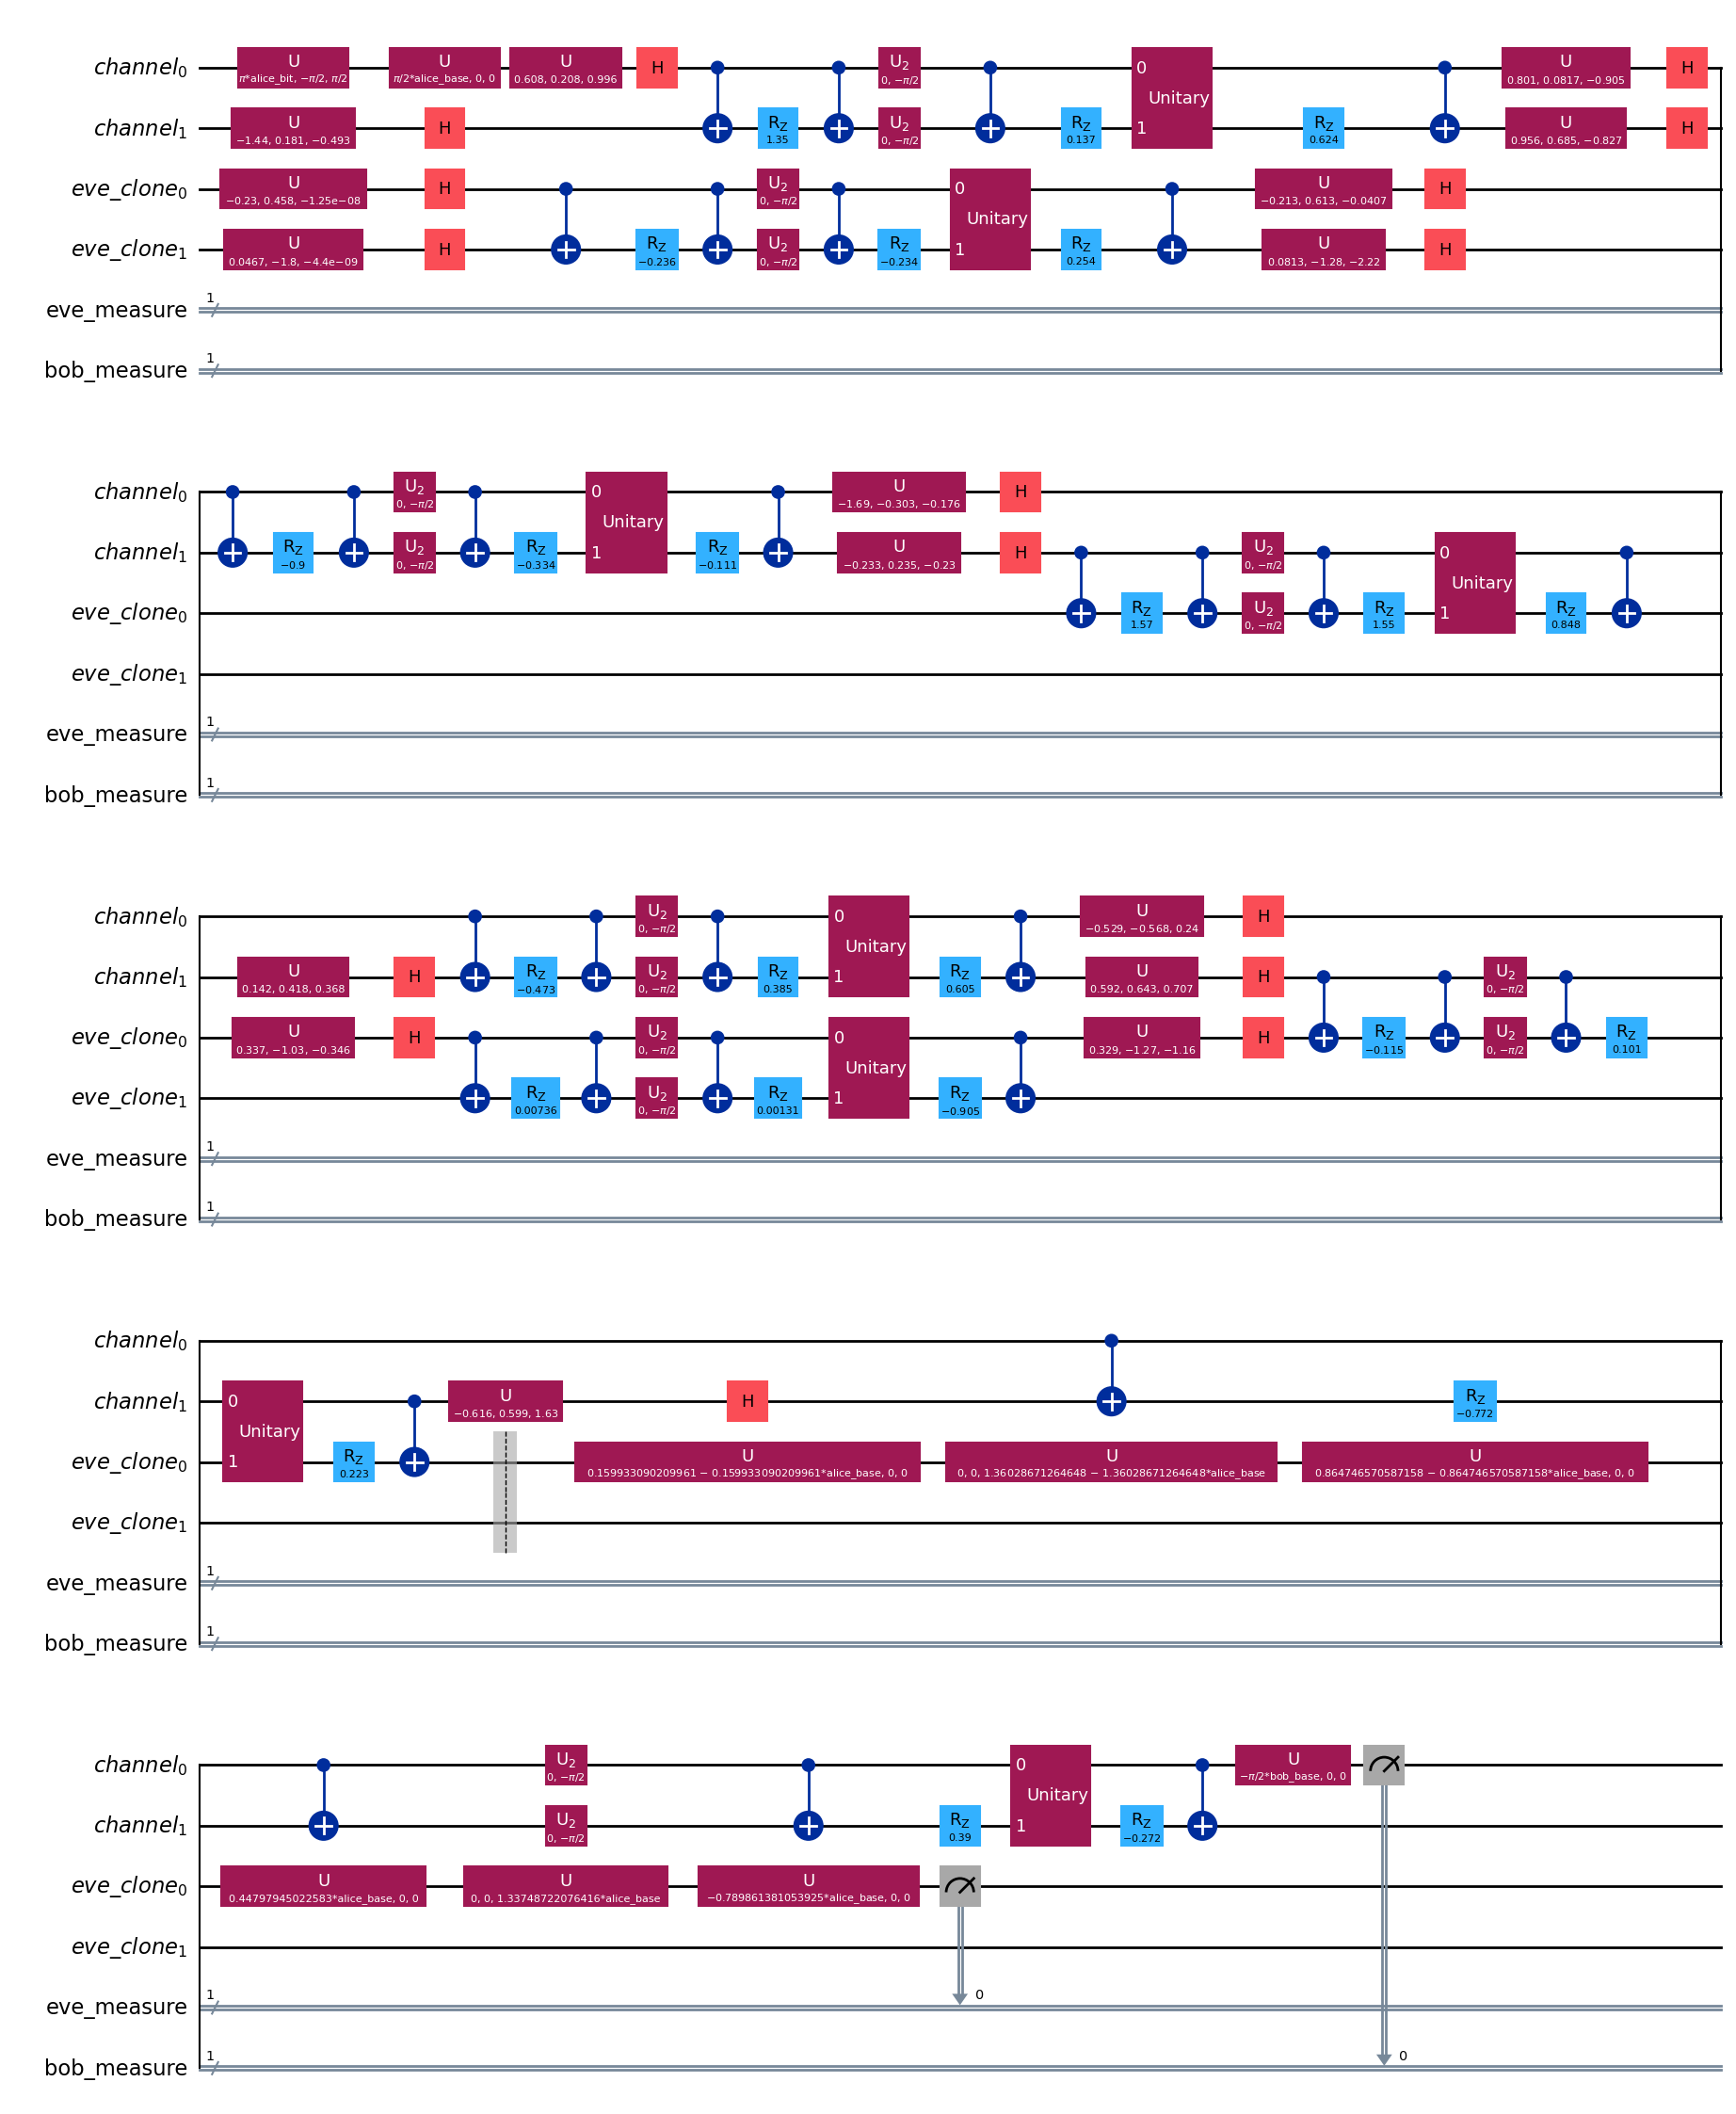

In [19]:
eve_protocol._qc.assign_parameters(eve_protocol.get_all_parameters()).draw("mpl")